In [ ]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [1]:
import csv

#Data Retrieving

reviews=[]
for row in csv.reader(open('C:\\Users\\Hassan\\Desktop\\bbcurdu.csv', encoding = "utf-8")):
    reviews.append(row)
#reviews = reviews[1:]  #This command removes the first row of the file as it only contains label(Heading)
#(reviews[:10])

In [5]:
import spacy
from spacy.lang.ur import Urdu
parser = Urdu()
from spacy.lang.ur.stop_words import STOP_WORDS
import nltk
stopwords = set(nltk.corpus.stopwords.words('urdu'))
#nltk.download('wordnet')
from nltk.corpus import wordnet as wn
import lemma

#Method defined for Tokenization of Documents
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.text.isdigit():
            lda_tokens.append('NUM')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

#Method defined for Lemmatization of Documents
def get_lemma(word):
    word = lemma.lemmatize(word)
    return word

final=[]     #In this list all of our pre processed data will be stored
for line in reviews:  
    for words in line:
        #implementation of all pre-processinf methods
        tokens = tokenize(words)
        tokens = [token for token in tokens if len(token) > 3]
        tokens = [token for token in tokens if token not in stopwords]
        tokens = [get_lemma(token) for token in tokens]
        final.append(tokens)
print(final)

[['\ufeff"نیشنل', 'اسٹیڈیم', 'کراچی', 'کراچی', 'کنگز', 'ملتان', 'سلطانز', 'خلاف', 'بالنگ', 'فیصلہ', 'جیتنے', 'فائنل', 'پہنچ', 'ہارنا', 'لاہور', 'پشاور', 'فاتح', 'کھیلا', 'گی۔ملتان', 'سلطانز', 'مسعود', 'کپتان', 'ذیشان', 'اشرف', 'ایڈم', 'لیتھ', 'ریلا', 'روسو', 'بوپارہ', 'خوشدل', 'شاہد', 'آفرید', 'سہیل', 'تنویر', 'الیاس', 'عمران', 'طاہر', 'عرفان', 'شامل', 'ہیں۔کراچ', 'کنگز', 'عماد', 'وسیم', 'کپتان', 'بابر', 'اعظم', 'شرجیل', 'الیکس', 'ہیلز', 'پارنیل', 'چیدوک', 'والٹن', 'عامر', 'وقاص', 'مقصود', 'ردرفورڈ', 'افتخار', 'احمد', 'ارشد', 'اقبال', 'شامل'], ['کراچی', 'پولیس', 'ترجمان', 'جانب', 'جاری', 'اعلامیے', 'مطابق', 'نیشنل', 'اسٹیڈیم', 'سمیت', 'متعلقہ', 'روٹس', 'ہوٹل', 'پولیس', 'بھاری', 'نفری', 'کمانڈوزکھلاڑ', 'سکیورٹی', 'موجود', 'کراچی', 'پولیس', 'سینئر', 'افسران', 'سمیت', 'گزیٹڈ', 'افسران،4275', 'ہیڈکانسٹیبل', 'کانسٹیبل', 'ریپڈ', 'رسپانس', 'فورس', 'جوان', 'اسپیشل', 'سیکیورٹی', 'یونٹ', 'کمانڈوز', 'تعین', 'ہیں۔نیشنل', 'اسٹیڈیم', 'کراچی', 'ہوٹل', 'اسپیشل', 'برانچ', 'سادہ', 'لباس', 'اہلکار', 'تعد

In [7]:
#Creating dictionary of all tokens
from gensim import corpora
dictionary = corpora.Dictionary(final)
print(dictionary)

Dictionary(1380 unique tokens: ['آفرید', 'احمد', 'ارشد', 'اسٹیڈیم', 'اشرف']...)


In [8]:
#Creating Bag of Words from Dictionary
corpus = [dictionary.doc2bow(text) for text in final]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(3, 3), (47, 5), (56, 1), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 2), (89, 2), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2),

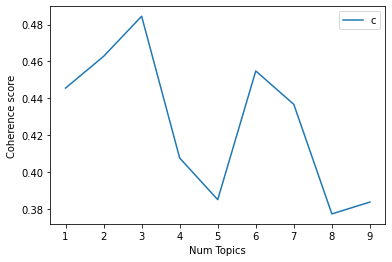

In [5]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

#Method Defined for Computing Coherence value of LDA
def compute_lda_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

#saving all calculated coherence values in array
model_list, coherence_values = compute_lda_coherence_values(dictionary=dictionary, corpus=corpus, texts=final, start=1, limit=10, step=1)

# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

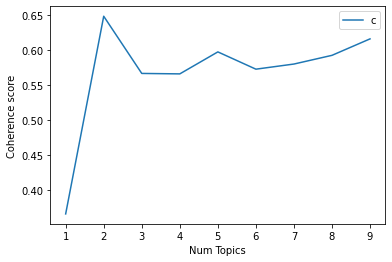

In [6]:
#Method Defined for Computing Coherence value of LSI
def compute_lsi_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LsiModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

#saving all calculated coherence values in array
model_list, coherence_values = compute_lsi_coherence_values(dictionary=dictionary, corpus=corpus, texts=final, start=1, limit=10, step=1)

# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [8]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import time

#implementing corpus to model for evaluation
t0= time.time()
ldamodel = LdaModel(corpus=corpus, num_topics=3, id2word=dictionary)
t1 = time.time() - t0
print("Time elapsed: ", t1)
ldamodel.show_topics()  

Time elapsed:  0.053968191146850586


[(0,
  '0.006*"پاکستان" + 0.006*"اسٹوریج" + 0.004*"بھارت" + 0.004*"ڈراما" + 0.004*"گوگل" + 0.004*"مطابق" + 0.004*"جاری" + 0.003*"کارکردگی" + 0.003*"فوٹو" + 0.003*"کراچی"'),
 (1,
  '0.007*"پاکستان" + 0.007*"کردار" + 0.007*"ڈراما" + 0.005*"میچز" + 0.005*"کراچی" + 0.004*"مرحلا" + 0.004*"کھلاڑی" + 0.004*"زلمی" + 0.004*"ڈسپلے" + 0.003*"پشاور"'),
 (2,
  '0.006*"کھلاڑی" + 0.006*"کراچی" + 0.004*"کنگز" + 0.004*"تیار" + 0.004*"پولیس" + 0.004*"لاہور" + 0.004*"میچز" + 0.004*"اسٹیڈیم" + 0.003*"شامل" + 0.003*"پشاور"')]

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

In [9]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=ldamodel, texts=final, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.43826795622731174


In [10]:
# Compute Coherence Score using u_mass
coherence_model_lda = CoherenceModel(model=ldamodel, texts=final, dictionary=dictionary, coherence='u_mass')
coherence_lda_umass = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_umass)


Coherence Score:  -9.082838828916088


In [11]:
#implementing corpus to model for evaluation

t0= time.time()
lsimodel = LsiModel(corpus=corpus, num_topics=3, id2word=dictionary)
t1 = time.time() - t0
print("Time elapsed: ", t1)
lsimodel.show_topics()

Time elapsed:  0.07695460319519043


[(0,
  '0.213*"کھلاڑی" + 0.182*"زلمی" + 0.177*"قلندرز" + 0.168*"میچز" + 0.163*"کارکردگی" + 0.162*"کپتان" + 0.161*"اسٹیڈیم" + 0.161*"پشاور" + 0.159*"کراچی" + 0.139*"سلطانز"'),
 (1,
  '-0.268*"ضرورت" + -0.248*"انڈسٹری" + -0.214*"مواد" + -0.177*"اداکار" + -0.168*"بھارت" + -0.158*"حکومت" + -0.156*"پاکستان" + -0.154*"پلیٹ" + -0.154*"فارم" + -0.149*"شمعون"'),
 (2,
  '0.168*"ضرور" + 0.158*"تیار" + -0.150*"جیتنے" + -0.147*"موقع" + 0.139*"بھرپور" + 0.127*"اچھ" + 0.124*"مداح" + -0.109*"آفریدی" + 0.108*"کھلاڑی" + 0.107*"میچز"')]

In [12]:
# Compute Coherence Score using c_v
coherence_model_lsi = CoherenceModel(model=lsimodel, texts=final, dictionary=dictionary, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi)


Coherence Score:  0.6370038315151118


In [13]:
# Compute Coherence Score using u_mass
coherence_model_lsi = CoherenceModel(model=lsimodel, texts=final, dictionary=dictionary, coherence='u_mass')
coherence_lsi_umass = coherence_model_lsi.get_coherence()
print('\nCoherence Score: ', coherence_lsi_umass)


Coherence Score:  -0.7358705873912968


In [14]:
#implementing corpus to model for evaluation

t0= time.time()
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
print("Time elapsed: ", t1)
hdpmodel.show_topics()

Time elapsed:  0.07695460319519043


[(0,
  '0.005*پہاڑ + 0.004*ضوابط + 0.004*یونیفائیڈ + 0.004*موقع + 0.004*آفیشل + 0.004*پشاور + 0.004*آئند + 0.003*لگتا + 0.003*ہوجائیں۔انھ + 0.003*باقی + 0.003*میلبورن + 0.003*آفریدی + 0.003*شکریہ + 0.003*ہیں،تیار + 0.003*خبرآئ + 0.003*کوشش + 0.003*دید + 0.003*سائیڈز + 0.003*فارمیٹ + 0.003*گا۔منگل'),
 (1,
  '0.005*سمجھتا + 0.004*ضرور + 0.004*یونیفائیڈ + 0.004*اورسپر + 0.004*بحال + 0.004*ریسکیو + 0.004*اسپیس + 0.004*برتر + 0.003*اوراس + 0.003*بھرپور + 0.003*شفقت + 0.003*کھلاڑی + 0.003*اسٹیڈیم + 0.003*ہورہا + 0.003*جنید + 0.003*میچز + 0.003*کرلا + 0.003*وائن + 0.003*پھل + 0.003*سلطانز'),
 (2,
  '0.005*سیاستدان + 0.005*بولنگ + 0.004*ضوابط + 0.004*ہوگی،خواہش + 0.004*باصلاحیت + 0.004*شمعون + 0.004*ریاض + 0.004*ضرورت + 0.004*انڈسٹری + 0.003*افریقی + 0.003*ٹرمپ + 0.003*ٹرانسسٹر + 0.003*مثال + 0.003*خالق + 0.003*101رنز + 0.003*زبان + 0.003*پلڑا + 0.003*جوائن + 0.003*مسئلہ + 0.003*ریلیز'),
 (3,
  '0.007*پولیس + 0.004*دریا + 0.004*فراہم + 0.004*کراچی + 0.004*سائنس + 0.004*دید + 0.004*کیا۔شمعو

In [17]:
# Compute Coherence Score using c_v
#coherence_model_hdp = CoherenceModel(model=hdpmodel, texts=final, dictionary=dictionary, coherence='c_v')
#coherence_hdp = coherence_model_hdp.get_coherence()
print('\nCoherence Score: ', coherence_hdp_cv)


Coherence Score:  0


In [18]:
# Compute Coherence Score using u_mass
#coherence_model_hdp = CoherenceModel(model=hdpmodel, texts=final, dictionary=dictionary, coherence='u_mass')
#coherence_hdp_umass = coherence_model_hdp.get_coherence()
print('\nCoherence Score: ', coherence_hdp_umass)


Coherence Score:  0


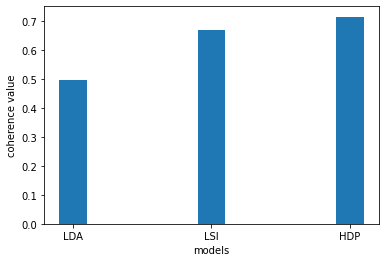

In [19]:
#Generatin graph for evaluating the coherence of every model

import numpy as np

def coherence_graph(coherence,label):
    assert len(coherence)==len(label)
    n=len(coherence)
    x=np.arange(n)
    plt.bar(x,coherence,width=0.2,tick_label=label,align='center')
    plt.xlabel('models')
    plt.ylabel('coherence value')

coherence_graph([coherence_lda,coherence_lsi,coherence_hdp_cv],['LDA','LSI','HDP'])

In [ ]:
!python -m pip install -U pyLDAvis